In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from matplotlib import style
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [73]:
# Cargar el conjunto de datos
beisbol_data = pd.read_csv(r'C:\Users\Diego\OneDrive\Escritorio\DatosEvaluacion\beisbol.csv')

In [74]:
beisbol_data

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762
5,5,New_S.,5600,718
6,6,New_Y.,5518,867
7,7,Milwaukee,5447,721
8,8,Colorado,5544,735
9,9,Houston,5598,615


In [75]:
# Codificar la columna 'equipos' usando one-hot encoding
beisbol_data = pd.get_dummies(beisbol_data, columns=['equipos'], drop_first=True)

In [76]:
# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = beisbol_data.drop('runs', axis=1)
y = beisbol_data['runs']

In [77]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Crear y entrenar el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [79]:
# Realizar predicciones en el conjunto de prueba
y_pred = regression_model.predict(X_test)

In [80]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

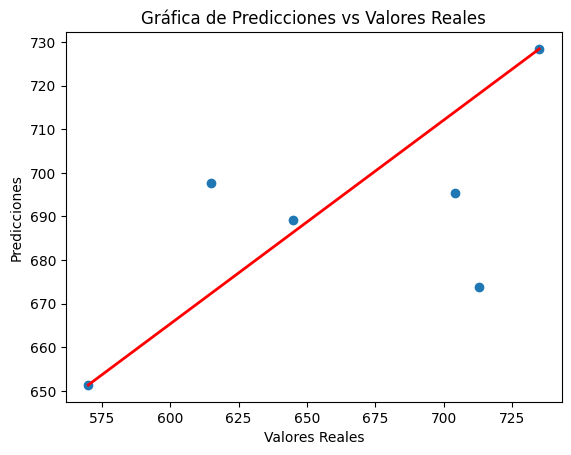

In [81]:
# Crear una gráfica de dispersión y línea de regresión
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfica de Predicciones vs Valores Reales')
plt.show()

In [82]:
# Interpretar los resultados
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

Error cuadrático medio (MSE): 2846.0684052806587
Coeficiente de determinación (R²): 0.17262780944068212


In [83]:
# Definir los valores de los hiperparámetros que deseas probar
param_grid = {
    'fit_intercept': [True, False]
}

In [84]:
# Crear el modelo de regresión lineal
regression_model = LinearRegression()

In [85]:
# Crear un objeto GridSearchCV con el modelo, la cuadrícula de hiperparámetros y la métrica a optimizar
grid_search = GridSearchCV(regression_model, param_grid, scoring='neg_mean_squared_error', cv=5)


In [86]:
# Ajustar el objeto GridSearchCV a tus datos de entrenamiento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [87]:
# Obtener los mejores hiperparámetros y la mejor puntuación
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Multiplicado por -1 porque se utiliza 'neg_mean_squared_error'

In [88]:
# Crear un nuevo modelo de regresión lineal con los mejores hiperparámetros encontrados
best_regression_model = LinearRegression(**best_params)

In [89]:
# Entrenar el modelo con los datos de entrenamiento
best_regression_model.fit(X_train, y_train)

LinearRegression()

In [90]:
# Realizar predicciones en el conjunto de prueba
y_pred_best = best_regression_model.predict(X_test)

In [91]:
# Evaluar el modelo con los mejores hiperparámetros
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

In [92]:
# Imprimir los resultados
print("Mejores hiperparámetros:", best_params)
print("Mejor puntuación:", best_score)
print("Error cuadrático medio (MSE) con mejores hiperparámetros:", mse_best)
print("Coeficiente de determinación (R²) con mejores hiperparámetros:", r2_best)

Mejores hiperparámetros: {'fit_intercept': True}
Mejor puntuación: 5924.697229268093
Error cuadrático medio (MSE) con mejores hiperparámetros: 2846.0684052806587
Coeficiente de determinación (R²) con mejores hiperparámetros: 0.17262780944068212


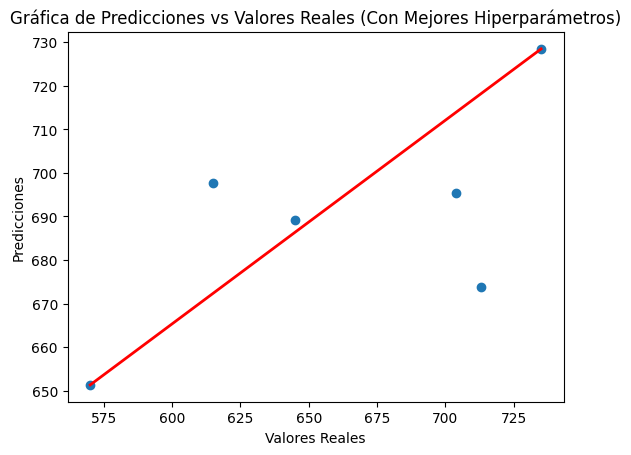

In [93]:
# Realizar predicciones en el conjunto de prueba usando el modelo con mejores hiperparámetros
y_pred_best = best_regression_model.predict(X_test)

# Crear una gráfica de dispersión y línea de regresión para el modelo con mejores hiperparámetros y resultados reales
plt.scatter(y_test, y_pred_best)
plt.plot([min(y_test), max(y_test)], [min(y_pred_best), max(y_pred_best)], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfica de Predicciones vs Valores Reales (Con Mejores Hiperparámetros)')
plt.show()
